# To detect the probabilities of fraudulent job postings for better recruitment management.

## Executive Summary 

We will be exploring the public dataset, Real or Fake Job Postings drawn from Kaggle. With the help of Python libraries NumPy, Pandas, Matplotlib and Seaborn, this presentation covers the Exploratory Data Analysis (EDA) and fits various Machine Learning techniques.

We will take a deep dive into the dataset to explore the predictive models for online job portals to adopt to reduce the numbers of fraudulent postings and to better plan their limited resources.This in turn will increase the credibility and enables more traction as more job seekers could learn on the potential real job oppotunities.



We aime to build classification models that uses text data features to predict which job descriptions is real or fake.Firstly EDA will be performed on the dataset to identify key features  of job descriptions which enables the prediction if its real or fake and draw insightful meanings.



In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set (rc={'figure.figsize': (10,6)})
from scipy import stats

%matplotlib inline



# Packages for data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')




## Problem Statement

Predict the probabilities of fake job postings. 

## Objective 

To get insights of the dataset and to understand the NLP features and other features which may be fradulent in nature. This in turn could help in the ML models to better pick out fake jobs and in turn reduces chances of employment scam.

## Data Investigation 

We get to understand the data structure and the following initial questions are formed before the deep dive. 1) Out of all the data rows, which are the fake job postings? 2) How to determine feature importance 3) How to clean textual data?
We will load the necessary Python libraries for our analysis and set some parameters:

In [2]:
Job_postings = pd.read_csv("/Users/sbuvana/Desktop/Data science/fake_job_postings.csv")
Job_postings.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [3]:
Job_postings.tail(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17870,17871,Senior Financial Analyst (Retail),"US, CA, Gardena",NaN,NaN,PROSULTING IS PEOPLE The ProSulting difference...,We are activity searching for a Senior Financi...,Must have a minimum of 3 + years in Financial ...,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0
17871,17872,Water Truck Driver,"US, PA, Waynesburg",NaN,NaN,Valor Services provides Workforce Solutions th...,Requires skilled work in operating commercial ...,GED or diploma required.Requires minimum of on...,NaN,0,1,1,Full-time,NaN,NaN,Oil & Energy,NaN,0
17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,0,Full-time,NaN,NaN,Internet,Product Management,0
17873,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,1,0,Contract,NaN,NaN,Utilities,NaN,0
17874,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [4]:
Job_postings.shape

(17880, 18)

In [5]:
("columns:",Job_postings.columns)

('columns:',
 Index(['job_id', 'title', 'location', 'department', 'salary_range',
        'company_profile', 'description', 'requirements', 'benefits',
        'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
        'required_experience', 'required_education', 'industry', 'function',
        'fraudulent'],
       dtype='object'))

In [6]:
Job_postings.describe().T

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [7]:
Job_postings.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [8]:
# Check Null Values
Job_postings.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
import re 

In [10]:
Job_postings = Job_postings.replace(np.nan, '', regex=True)

In [11]:
Job_postings.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [12]:
Job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             17880 non-null  object
 16  func

In [13]:
Job_postings.tail(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17870,17871,Senior Financial Analyst (Retail),"US, CA, Gardena",,,PROSULTING IS PEOPLE The ProSulting difference...,We are activity searching for a Senior Financi...,Must have a minimum of 3 + years in Financial ...,,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0
17871,17872,Water Truck Driver,"US, PA, Waynesburg",,,Valor Services provides Workforce Solutions th...,Requires skilled work in operating commercial ...,GED or diploma required.Requires minimum of on...,,0,1,1,Full-time,,,Oil & Energy,,0
17872,17873,Product Manager,"US, CA, San Francisco",Product Development,,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,0,Full-time,,,Internet,Product Management,0
17873,17874,Recruiting Coordinator,"US, NC, Charlotte",,,,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,,0,1,0,Contract,,,Utilities,,0
17874,17875,JavaScript Developer,"US, ,",,80000-100000,,"Sr, JavaScript Developer Experience : 4-10 yea...",,,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,,0
17878,17879,Graphic Designer,"NG, LA, Lagos",,,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,,0,1,1,Full-time,Mid-Senior level,,Computer Software,Engineering,0


In [14]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in Job_postings.columns:
        print(column_name, ": ", get_var_category(Job_postings[column_name]))

In [15]:
print_categories('title')

job_id :  Numerical
title :  Categorical
location :  Categorical
department :  Categorical
salary_range :  Categorical
company_profile :  Categorical
description :  Categorical
requirements :  Categorical
benefits :  Categorical
telecommuting :  Numerical
has_company_logo :  Numerical
has_questions :  Numerical
employment_type :  Categorical
required_experience :  Categorical
required_education :  Categorical
industry :  Categorical
function :  Categorical
fraudulent :  Numerical


In [16]:
Job_postings.drop(['job_id'], axis=1, inplace= True)

In [17]:
Job_postings.corr()

,telecommuting,has_company_logo,has_questions,fraudulent
telecommuting,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.019836,1.000000,0.233932,-0.261971
has_questions,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.034523,-0.261971,-0.091627,1.000000


# EDA

Explore dataset. General overview of the feature variables to predict fraudulent job postings. To also plot the relationship between target variable ("fradulent") and other features. After the EDA, we can then plot to do feature importance and proceed to text cleaning to perform the rest of the predictive analysis.

In [18]:
Job_postings.shape

(17880, 17)

In [19]:
Job_postings.nunique()

title                  11231
location                3106
department              1338
salary_range             875
company_profile         1710
description            14802
requirements           11969
benefits                6206
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
dtype: int64

In [20]:
Job_postings["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

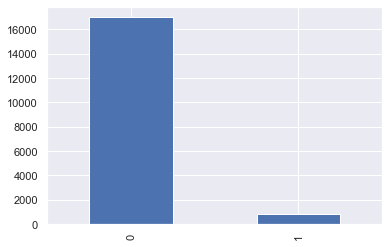

In [21]:
Job_postings["fraudulent"].value_counts().plot(kind='bar');

In [22]:
Job_postings['location'].value_counts()

GB, LND, London            718
US, NY, New York           658
US, CA, San Francisco      472
GR, I, Athens              464
                           346
                          ... 
US, PA, Mt. Pocono           1
GB, EDH, Hermiston Gait      1
GB, LND, The Peak            1
US, MS, oxford               1
US, WI, Jackson              1
Name: location, Length: 3106, dtype: int64

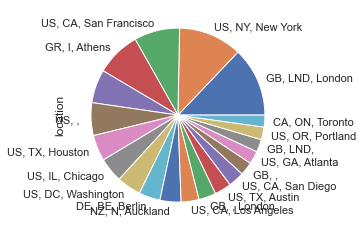

In [23]:
Job_postings['location'].value_counts()[:20].plot(kind='pie');

In [24]:
Job_postings['department'].value_counts()[:10]

                          11547
Sales                       551
Engineering                 487
Marketing                   401
Operations                  270
IT                          225
Development                 146
Product                     112
Information Technology       86
Technology                   76
Name: department, dtype: int64

We note that most job posters didn't even specify the departments.Around 11547 rows didn't specify the department and this itself could lead to insufficient data to analyse the relationship to fraudlent posters.

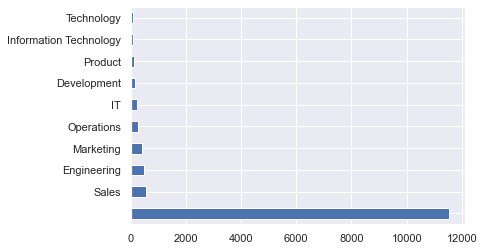

In [25]:
Job_postings['department'].value_counts()[:10].plot(kind='barh');

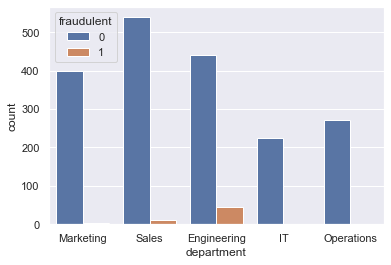

In [26]:
sns.countplot(x='department',data=Job_postings[((Job_postings['department']=='Sales')|(Job_postings['department']=='Engineering')|(Job_postings['department']=='Marketing')|
                                               (Job_postings['department']=='Operations')|(Job_postings['department']=='IT'))],hue='fraudulent');

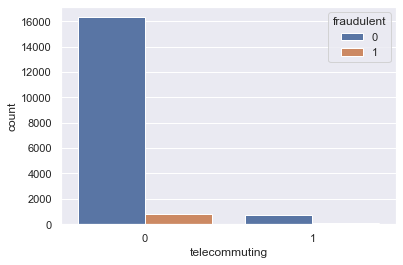

In [27]:
sns.countplot(x='telecommuting',data=Job_postings,hue='fraudulent');

Some columns contains text. This will require more text cleaning efforts to interpret their meaning and to study causal relationship to target variables.

In [28]:
Job_postings['requirements']

0        Experience with content management systems a m...
1        What we expect from you:Your key responsibilit...
2        Implement pre-commissioning and commissioning ...
3        EDUCATION: Bachelor’s or Master’s in GIS, busi...
4        QUALIFICATIONS:RN license in the State of Texa...
                               ...                        
17875    To ace this role you:Will eat comprehensive St...
17876    - B.A. or B.S. in Accounting- Desire to have f...
17877    At least 12 years professional experience.Abil...
17878    1. Must be fluent in the latest versions of Co...
17879    We want to hear from you if:You have an in-dep...
Name: requirements, Length: 17880, dtype: object

In [29]:
Job_postings['benefits']

0                                                         
1        What you will get from usThrough being part of...
2                                                         
3        Our culture is anything but corporate—we have ...
4                                    Full Benefits Offered
                               ...                        
17875    What can you expect from us?We have an open cu...
17876    Health &amp; WellnessMedical planPrescription ...
17877                                                     
17878    Competitive salary (compensation will be based...
17879                                                     
Name: benefits, Length: 17880, dtype: object

In [30]:
Job_postings['has_company_logo'].value_counts()

1    14220
0     3660
Name: has_company_logo, dtype: int64

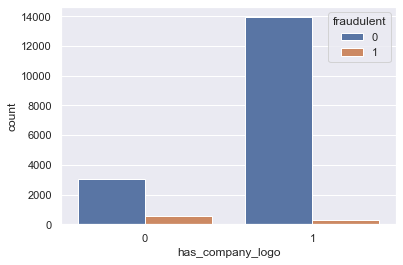

In [31]:
sns.countplot(x='has_company_logo',data=Job_postings,hue='fraudulent');

In [32]:
Job_postings['employment_type'].value_counts()

Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

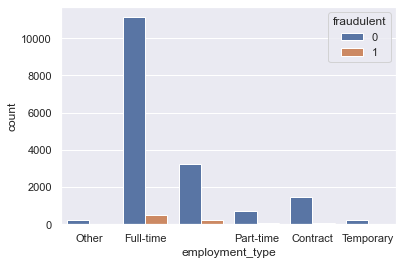

In [33]:
sns.countplot(x='employment_type',data=Job_postings[((Job_postings['employment_type']=='Full-time')|(Job_postings['employment_type']=='Contract')|(Job_postings['employment_type']=='Part-time')|
                                               (Job_postings['employment_type']=='Temporary')|(Job_postings['employment_type']=='Other')|(Job_postings['employment_type']==''))],hue='fraudulent');

In [34]:
Job_postings['required_experience'].unique()

array(['Internship', 'Not Applicable', '', 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

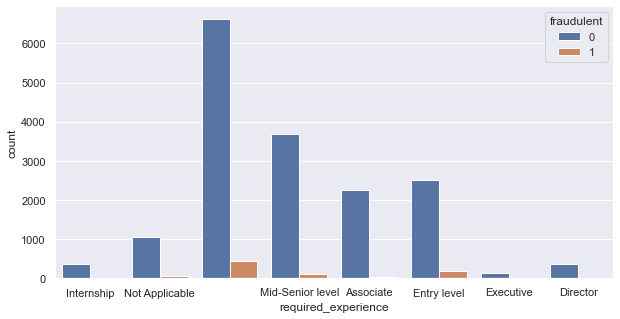

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='required_experience',data=Job_postings,hue='fraudulent');

Most of the fake job postings are prevalent in the mid-senior experience required posters.

In [36]:
Job_postings['required_education'].value_counts()[:10]

                                     8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Name: required_education, dtype: int64

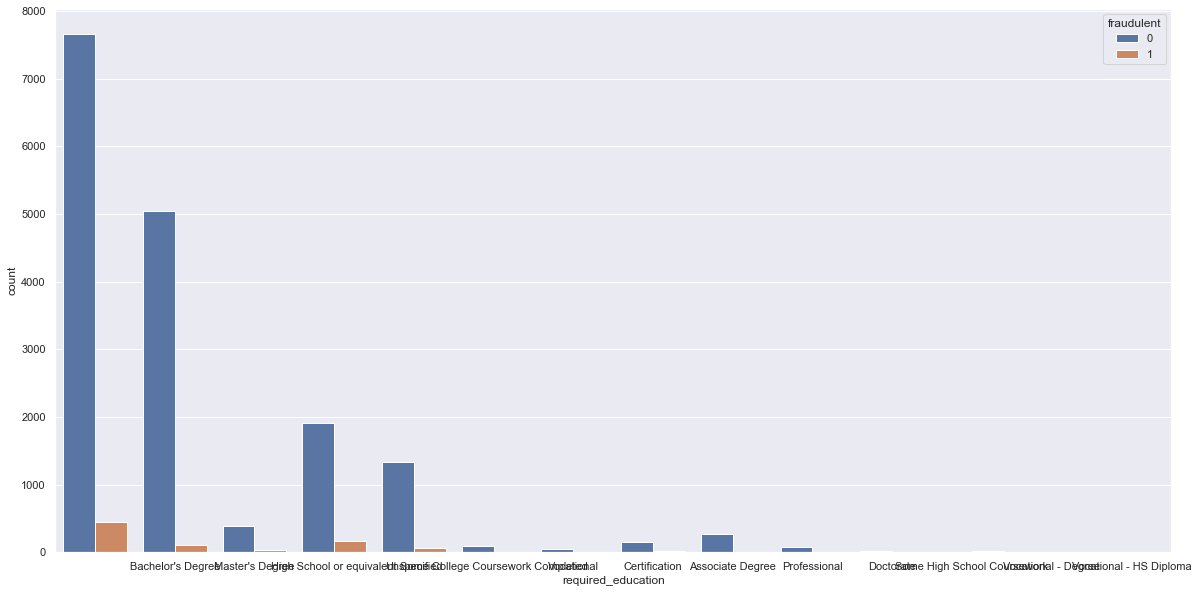

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='required_education',data=Job_postings,hue='fraudulent');

In [38]:
Job_postings.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [39]:
corr_matrix = Job_postings.corr()
print(corr_matrix["fraudulent"].sort_values(ascending=False))

fraudulent          1.000000
telecommuting       0.034523
has_questions      -0.091627
has_company_logo   -0.261971
Name: fraudulent, dtype: float64


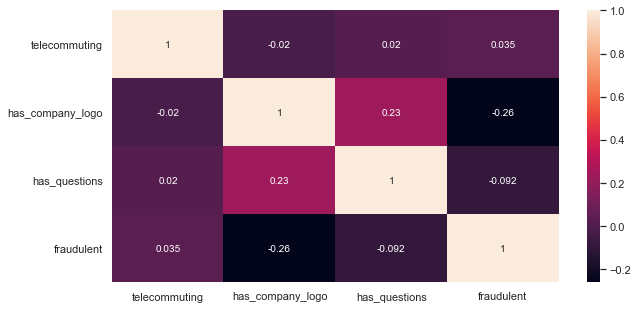

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [41]:
print_categories('title')

title :  Categorical
location :  Categorical
department :  Categorical
salary_range :  Categorical
company_profile :  Categorical
description :  Categorical
requirements :  Categorical
benefits :  Categorical
telecommuting :  Numerical
has_company_logo :  Numerical
has_questions :  Numerical
employment_type :  Categorical
required_experience :  Categorical
required_education :  Categorical
industry :  Categorical
function :  Categorical
fraudulent :  Numerical


# Pre processing of Data

In [42]:
Job_postings.drop(['location','salary_range'], axis=1, inplace=True)

In [43]:
Job_postings.columns

Index(['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [44]:
Job_postings['employment_type'].value_counts()

Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

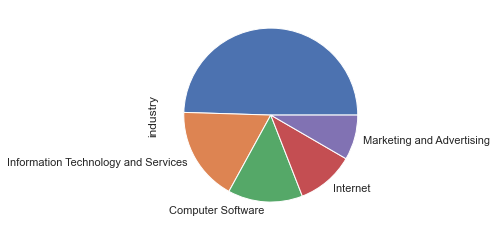

In [45]:
Job_postings['industry'].value_counts()[:5].plot(kind='pie');

In [46]:
Job_postings.shape

(17880, 15)

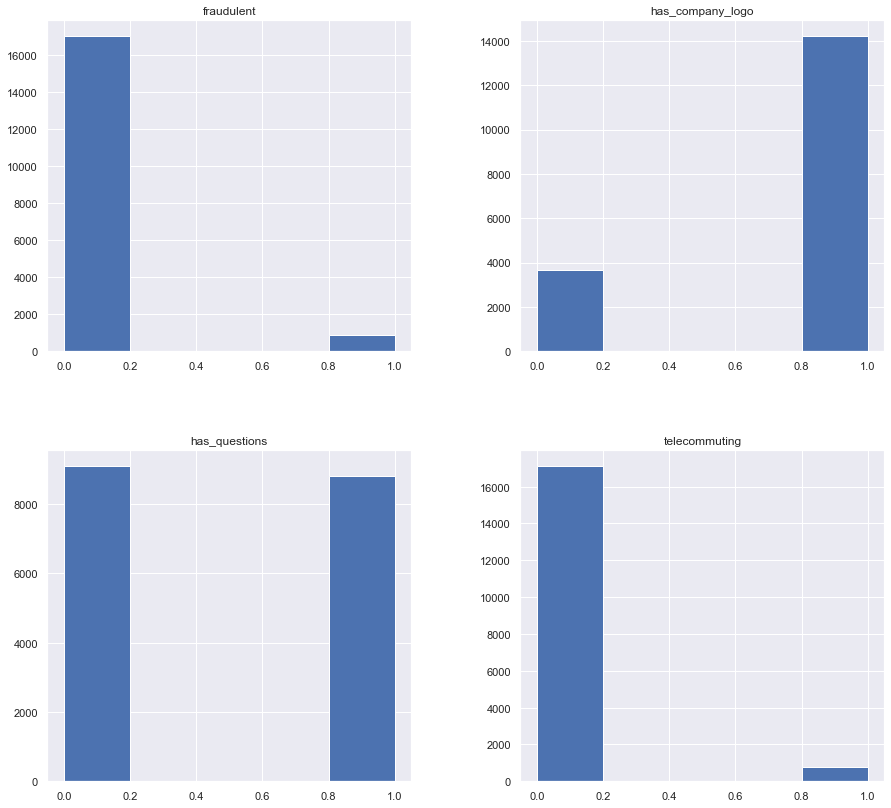

In [47]:
Job_postings.hist(bins=5,figsize=(15, 14))
plt.show()

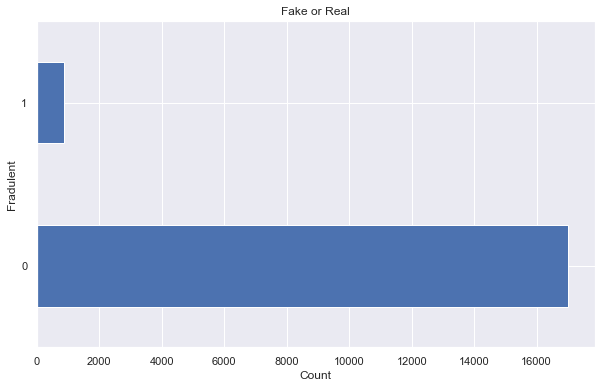

In [48]:
plt.figure(figsize=(10,6))
Job_postings["fraudulent"].value_counts().plot(kind='barh')

plt.title('Fake or Real')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Fradulent', fontsize=12);

In [49]:
Job_postings.columns

Index(['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [50]:
Job_postings.head(5)

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Pre-Processing of Features

In [51]:
from sklearn.preprocessing import LabelEncoder
columns= ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']
label_encoder = LabelEncoder()
for i in columns:
    Job_postings[i] = label_encoder .fit_transform(Job_postings[i])


In [52]:
Job_postings.head(5)

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,3,5,0,0,23,0
1,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,2,7,0,76,8,0
2,Commissioning Machinery Assistant (CMA),,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,0,0,0,0,0,0
3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,2,6,2,23,32,0
4,Bill Review Manager,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,2,6,2,52,17,0


# Inspect Text Data

In [53]:
print(Job_postings['title'][:1000])

0                                   Marketing Intern
1          Customer Service - Cloud Video Production
2            Commissioning Machinery Assistant (CMA)
3                  Account Executive - Washington DC
4                                Bill Review Manager
                           ...                      
995                                     Data Analyst
996      Financial Analyst / Intermediate Accountant
997                              EXECUTIVE SOUS CHEF
998                         Bookeeper/Supply Manager
999    Project Manager: Software and Web Development
Name: title, Length: 1000, dtype: object


In [54]:
print(Job_postings['company_profile'][:1000])

0      We're Food52, and we've created a groundbreaki...
1      90 Seconds, the worlds Cloud Video Production ...
2      Valor Services provides Workforce Solutions th...
3      Our passion for improving quality of life thro...
4      SpotSource Solutions LLC is a Global Human Cap...
                             ...                        
995    Intercom (#URL_cb674f93cbcd215a3a0a57a8615a565...
996    Great Customer Service from Start to FinishWha...
997    Le Meridien is situated in the heart of kuala ...
998                                                     
999    PINT is a leader in the web industry with 20 y...
Name: company_profile, Length: 1000, dtype: object


In [55]:
print(Job_postings['department'][:1000])

0      Marketing
1        Success
2               
3          Sales
4               
         ...    
995             
996      Finance
997             
998             
999             
Name: department, Length: 1000, dtype: object


In [56]:
Job_postings['department'].value_counts()

                                    11547
Sales                                 551
Engineering                           487
Marketing                             401
Operations                            270
                                    ...  
Opearations                             1
Industrial Services                     1
Finance and Operations                  1
Integration & Testing                   1
Maintenance Technician/Projects         1
Name: department, Length: 1338, dtype: int64

In [57]:
Job_postings.drop(['department'], axis=1, inplace= True)

In [58]:
Job_postings['description'][:1000]

0      Food52, a fast-growing, James Beard Award-winn...
1      Organised - Focused - Vibrant - Awesome!Do you...
2      Our client, located in Houston, is actively se...
3      THE COMPANY: ESRI – Environmental Systems Rese...
4      JOB TITLE: Itemization Review ManagerLOCATION:...
                             ...                        
995    About the jobAt Intercom we believe that data ...
996    Centra Construction Group, a well established,...
997    Responsible for assisting in the direction and...
998    Full time Bookkeeper for local Southampton ene...
999    PINT is seeking a detail-oriented and impassio...
Name: description, Length: 1000, dtype: object

In [59]:
Job_postings['requirements'][:1000]

0      Experience with content management systems a m...
1      What we expect from you:Your key responsibilit...
2      Implement pre-commissioning and commissioning ...
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...
4      QUALIFICATIONS:RN license in the State of Texa...
                             ...                        
995    A proven track record of initiating and delive...
996    The successful applicant will have the followi...
997                                                     
998                     Heavy Quickbooks 2013 experience
999    Project/account management aptitude with the k...
Name: requirements, Length: 1000, dtype: object

In [60]:
Job_postings['benefits'][:1000]

0                                                       
1      What you will get from usThrough being part of...
2                                                       
3      Our culture is anything but corporate—we have ...
4                                  Full Benefits Offered
                             ...                        
995    Stock option grants in a fast growing companyC...
996                                                     
997                                                     
998                          MedicalPaid Time Off Policy
999    We offer industry-competitive salaries, health...
Name: benefits, Length: 1000, dtype: object

## Basic Text Cleaning

In [61]:
def clean_text(company_profile):
    # reduce multiple spaces and newlines to only one
    company_profile = re.sub(r'(\s\s+|\n\n+)', r'\1', company_profile)
    # remove double quotes
    company_profile = re.sub(r'"', '', company_profile)
    # remove extra whitespace and special characters
    company_profile = re.sub(r'\s+$', '', company_profile)
    company_profile = re.sub(r'\^s+', '', company_profile)
    company_profile = re.sub(r'[^a-zA-Z\s]+', '', company_profile)
    #lowercase
    company_profile= company_profile.lower()
    # remove text between square brackets
    company_profile =re.sub('\[[^]]*\]', '',company_profile)
    
      
    # removes punctuation
    company_profile= re.sub(r'[^\w\s]','',company_profile)
    company_profile = re.sub(r'\n',' ',company_profile)
    company_profile= re.sub(r'[0-9]+','',company_profile)
    company_profile= re.sub(r'[0-9]+','',company_profile)
     # remove URLs 
    company_profile = re.sub(r'https://t.co\S+\s*', '', company_profile) 
    company_profile = re.sub(r'http://t.co\S+\s*', '', company_profile) 
    
    return company_profile

In [62]:
def clean_text_1(title):
    title= re.sub(r'(\s\s+|\n\n+)', r'\1', title)

    title = re.sub(r'"', '', title)
    title = re.sub(r'\s+$', '', title)
    title = re.sub(r'\^s+', '', title)
    title = re.sub(r'[^a-zA-Z\s]+', '', title)
    title= title.lower()
    title =re.sub('\[[^]]*\]', '',title)
    
    
    title= re.sub(r'[^\w\s]','',title)
    title = re.sub(r'\n',' ',title)
    title= re.sub(r'[0-9]+','',title)
    title= re.sub(r'[0-9]+','',title)
    
    
    return title

In [63]:
def clean_text_2(description):
    description = re.sub(r'(\s\s+|\n\n+)', r'\1', description)
    description= re.sub(r'"', '', description)
    description = re.sub(r'\s+$', '', description)
    description = re.sub(r'\^s+', '', description)
    description = re.sub(r'[^a-zA-Z\s]+', '', description)
    description= description.lower()
    description =re.sub('\[[^]]*\]', '',description)
    
    description= re.sub(r'[^\w\s]','',description)
    description = re.sub(r'\n',' ',description)
    description= re.sub(r'[0-9]+','',description)
    description= re.sub(r'[0-9]+','',description)
    description = re.sub(r'https://t.co\S+\s*', '', description) 
    description  = re.sub(r'http://t.co\S+\s*', '', description)
    
    
    return description

In [64]:
def clean_text_3(requirements):
    requirements = re.sub(r'(\s\s+|\n\n+)', r'\1', requirements)
    requirements= re.sub(r'"', '', requirements)
    requirements = re.sub(r'\s+$', '', requirements)
    requirements = re.sub(r'\^s+', '', requirements)
    requirements = re.sub(r'[^a-zA-Z\s]+', '', requirements)
    requirements= requirements.lower()
    requirements =re.sub('\[[^]]*\]', '',requirements)
    
    requirements= re.sub(r'[^\w\s]','',requirements)
    requirements = re.sub(r'\n',' ',requirements)
    requirements= re.sub(r'[0-9]+','',requirements)
    requirements= re.sub(r'[0-9]+','',requirements)
    requirements = re.sub(r'https://t.co\S+\s*', '', requirements) 
    requirements  = re.sub(r'http://t.co\S+\s*', '', requirements)
    
    return requirements

In [65]:
def clean_text_4(benefits):
    benefits = re.sub(r'(\s\s+|\n\n+)', r'\1', benefits)
    benefits= re.sub(r'"', '', benefits)
    benefits = re.sub(r'\s+$', '', benefits)
    benefits = re.sub(r'\^s+', '', benefits)
    benefits = re.sub(r'[^a-zA-Z\s]+', '', benefits)
    benefits= benefits.lower()
    benefits =re.sub('\[[^]]*\]', '',benefits)
    
    benefits= re.sub(r'[^\w\s]','',benefits)
    benefits = re.sub(r'\n',' ',benefits)
    benefits= re.sub(r'[0-9]+','',benefits)
    benefits= re.sub(r'[0-9]+','',benefits)
    
    return benefits

In [66]:

Job_postings['company_profile'] = Job_postings['company_profile'].apply(clean_text)

In [67]:

Job_postings['company_profile'] .head(5)

0    were food and weve created a groundbreaking an...
1     seconds the worlds cloud video production ser...
2    valor services provides workforce solutions th...
3    our passion for improving quality of life thro...
4    spotsource solutions llc is a global human cap...
Name: company_profile, dtype: object

In [68]:
Job_postings['title'] = Job_postings['title'].apply(clean_text_1)

In [69]:
Job_postings['title'] .head(5)

0                            marketing intern
1    customer service  cloud video production
2       commissioning machinery assistant cma
3            account executive  washington dc
4                         bill review manager
Name: title, dtype: object

In [70]:
Job_postings['description'] = Job_postings['description'].apply(clean_text_2)

In [71]:
Job_postings['description'] .head(5)

0    food a fastgrowing james beard awardwinning on...
1    organised  focused  vibrant  awesomedo you hav...
2    our client located in houston is actively seek...
3    the company esri  environmental systems resear...
4    job title itemization review managerlocation f...
Name: description, dtype: object

In [72]:
Job_postings['requirements'] = Job_postings['requirements'].apply(clean_text_3)

In [73]:
Job_postings['requirements'] .head(5)

0    experience with content management systems a m...
1    what we expect from youyour key responsibility...
2    implement precommissioning and commissioning p...
3    education bachelors or masters in gis business...
4    qualificationsrn license in the state of texas...
Name: requirements, dtype: object

In [74]:
Job_postings['benefits'] = Job_postings['benefits'].apply(clean_text_3)

In [75]:
Job_postings['benefits'] .head(5)

0                                                     
1    what you will get from usthrough being part of...
2                                                     
3    our culture is anything but corporatewe have a...
4                                full benefits offered
Name: benefits, dtype: object

In [76]:
Job_postings['benefits'].value_counts()

## Word Count 

In [77]:
Job_postings.index = Job_postings.index + 1

In [78]:
Job_postings['word_count_d'] = Job_postings['description'].apply(lambda x: len(str(x).split(" ")))
Job_postings[['description','word_count_d']].head()

,description,word_count_d
1,food a fastgrowing james beard awardwinning on...,124
2,organised focused vibrant awesomedo you hav...,309
3,our client located in houston is actively seek...,50
4,the company esri environmental systems resear...,345
5,job title itemization review managerlocation f...,182


In [79]:
Job_postings.index = Job_postings.index + 1

In [80]:
Job_postings['word_count_t'] = Job_postings['title'].apply(lambda y: len(str(y).split(" ")))
Job_postings[['title','word_count_t']].head()

,title,word_count_t
2,marketing intern,2
3,customer service cloud video production,6
4,commissioning machinery assistant cma,4
5,account executive washington dc,5
6,bill review manager,3


In [81]:
Job_postings.index = Job_postings.index + 1

In [82]:
Job_postings['word_count_cp'] = Job_postings['company_profile'].apply(lambda y: len(str(y).split(" ")))
Job_postings[['company_profile','word_count_cp']].head()

,company_profile,word_count_cp
3,were food and weve created a groundbreaking an...,141
4,seconds the worlds cloud video production ser...,150
5,valor services provides workforce solutions th...,136
6,our passion for improving quality of life thro...,85
7,spotsource solutions llc is a global human cap...,205


In [83]:
Job_postings.index = Job_postings.index + 1

In [84]:
Job_postings['word_count_b'] = Job_postings['benefits'].apply(lambda y: len(str(y).split(" ")))
Job_postings[['benefits','word_count_b']].head()

,benefits,word_count_b
4,,1
5,what you will get from usthrough being part of...,225
6,,1
7,our culture is anything but corporatewe have a...,96
8,full benefits offered,3


In [85]:
Job_postings.index = Job_postings.index + 1

In [86]:
Job_postings['word_count_r'] = Job_postings['requirements'].apply(lambda y: len(str(y).split(" ")))
Job_postings[['requirements','word_count_r']].head()

,requirements,word_count_r
5,experience with content management systems a m...,115
6,what we expect from youyour key responsibility...,187
7,implement precommissioning and commissioning p...,164
8,education bachelors or masters in gis business...,174
9,qualificationsrn license in the state of texas...,89


## Character Count

In [87]:

Job_postings['char_count_d'] = Job_postings["description"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

In [88]:
Job_postings['char_count_r'] = Job_postings["requirements"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

In [89]:
Job_postings['char_count_b'] = Job_postings["benefits"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

In [90]:
Job_postings['char_count_t'] = Job_postings["title"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

In [91]:
Job_postings['char_count_cp'] = Job_postings["company_profile"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

In [92]:
Job_postings.columns

Index(['title', 'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'word_count_d', 'word_count_t', 'word_count_cp',
       'word_count_b', 'word_count_r', 'char_count_d', 'char_count_r',
       'char_count_b', 'char_count_t', 'char_count_cp'],
      dtype='object')

## Word density

In [93]:
Job_postings['word_density_d'] = Job_postings['char_count_d'] / Job_postings['word_count_d']


In [94]:
Job_postings['word_density_cp'] = Job_postings['char_count_cp'] / Job_postings['word_count_cp']

In [95]:
Job_postings['word_density_r'] = Job_postings['char_count_r'] / Job_postings['word_count_r']

In [96]:
Job_postings['word_density_t'] = Job_postings['char_count_t'] / Job_postings['word_count_t']

In [97]:
Job_postings['word_density_b'] = Job_postings['char_count_b'] / Job_postings['word_count_b']

In [98]:
Job_postings.head()

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,...,char_count_d,char_count_r,char_count_b,char_count_t,char_count_cp,word_density_d,word_density_cp,word_density_r,word_density_t,word_density_b
5,marketing intern,were food and weve created a groundbreaking an...,food a fastgrowing james beard awardwinning on...,experience with content management systems a m...,,0,1,0,3,5,...,752,715,0,15,710,6.064516,5.035461,6.217391,7.500000,0.000000
6,customer service cloud video production,seconds the worlds cloud video production ser...,organised focused vibrant awesomedo you hav...,what we expect from youyour key responsibility...,what you will get from usthrough being part of...,0,1,0,2,7,...,1648,1172,1022,35,909,5.333333,6.060000,6.267380,5.833333,4.542222
7,commissioning machinery assistant cma,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement precommissioning and commissioning p...,,0,1,0,0,0,...,299,1173,0,34,728,5.980000,5.352941,7.152439,8.500000,0.000000
8,account executive washington dc,our passion for improving quality of life thro...,the company esri environmental systems resear...,education bachelors or masters in gis business...,our culture is anything but corporatewe have a...,0,1,0,2,6,...,2213,1228,669,28,509,6.414493,5.988235,7.057471,5.600000,6.968750
9,bill review manager,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualificationsrn license in the state of texas...,full benefits offered,0,1,1,2,6,...,1300,653,19,17,1327,7.142857,6.473171,7.337079,5.666667,6.333333


In [99]:
Job_postings.dtypes

title                   object
company_profile         object
description             object
requirements            object
benefits                object
telecommuting            int64
has_company_logo         int64
has_questions            int64
employment_type          int64
required_experience      int64
required_education       int64
industry                 int64
function                 int64
fraudulent               int64
word_count_d             int64
word_count_t             int64
word_count_cp            int64
word_count_b             int64
word_count_r             int64
char_count_d             int64
char_count_r             int64
char_count_b             int64
char_count_t             int64
char_count_cp            int64
word_density_d         float64
word_density_cp        float64
word_density_r         float64
word_density_t         float64
word_density_b         float64
dtype: object

# Work with Text Columns 

In [100]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from string import punctuation


stop = stopwords.words('english')


In [101]:
def convert_text(description, remove_stop=True, lemma_words=False):
    
       # Remove stop words
    if remove_stop:
        description = description.split()
        description = [w for w in description if not w in stop]
        description = " ".join(description)
    

        
    #remove lemma_words
    if lemma_words:
        description = description.split()
        wl = nltk.stem.WordNetLemmatizer()
        lemma = ' '.join([wl.lemmatize(word) for word in description.split()])
    # tokenize
        description = nltk.word_tokenize(description)
       
        
    return description

In [102]:
%%time
Job_postings['description1'] = Job_postings['description'].apply(convert_text)

Job_postings['description1'] = Job_postings['description1'].apply(lambda x: " ".join([str(word) for word in x]))



CPU times: user 6 s, sys: 22.2 ms, total: 6.03 s
Wall time: 6.03 s


In [103]:
Job_postings.head()

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,...,char_count_r,char_count_b,char_count_t,char_count_cp,word_density_d,word_density_cp,word_density_r,word_density_t,word_density_b,description1
5,marketing intern,were food and weve created a groundbreaking an...,food a fastgrowing james beard awardwinning on...,experience with content management systems a m...,,0,1,0,3,5,...,715,0,15,710,6.064516,5.035461,6.217391,7.500000,0.000000,f o o d f a s t g r o w i n g j a m e s ...
6,customer service cloud video production,seconds the worlds cloud video production ser...,organised focused vibrant awesomedo you hav...,what we expect from youyour key responsibility...,what you will get from usthrough being part of...,0,1,0,2,7,...,1172,1022,35,909,5.333333,6.060000,6.267380,5.833333,4.542222,o r g a n i s e d f o c u s e d v i b r a ...
7,commissioning machinery assistant cma,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement precommissioning and commissioning p...,,0,1,0,0,0,...,1173,0,34,728,5.980000,5.352941,7.152439,8.500000,0.000000,c l i e n t l o c a t e d h o u s t o n ...
8,account executive washington dc,our passion for improving quality of life thro...,the company esri environmental systems resear...,education bachelors or masters in gis business...,our culture is anything but corporatewe have a...,0,1,0,2,6,...,1228,669,28,509,6.414493,5.988235,7.057471,5.600000,6.968750,c o m p a n y e s r i e n v i r o n m e n ...
9,bill review manager,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualificationsrn license in the state of texas...,full benefits offered,0,1,1,2,6,...,653,19,17,1327,7.142857,6.473171,7.337079,5.666667,6.333333,j o b t i t l e i t e m i z a t i o n r ...


In [104]:
def convert_text_1(title, remove_stop=True, lemma_words=False):
    
   
    
    # Remove stop words
    if remove_stop:
        title = title.split()
        title = [w for w in title if not w in stop]
        title= " ".join(title)
        
    #remove lemma_words
    if lemma_words:
        title = title.split()
        wl = nltk.stem.WordNetLemmatizer()
        lemma = ' '.join([wl.lemmatize(word) for word in title.split()])
        
        # tokenize
        title = nltk.word_tokenize(title)
       
    return title

In [105]:
%%time
Job_postings['title1'] = Job_postings['title'].apply(convert_text_1)

Job_postings['title1'] = Job_postings['title1'].apply(lambda x: " ".join([str(word) for word in x]))



CPU times: user 190 ms, sys: 2.46 ms, total: 192 ms
Wall time: 192 ms


In [106]:
def convert_text_2(requirements, remove_stop=True, lemma_words=False):
    
   
    
    # Remove stop words
    if remove_stop:
        requirements = requirements.split()
        requirements= [w for w in requirements if not w in stop]
        requirements= " ".join(requirements)
        
    #remove lemma_words
    if lemma_words:
        requirements = requirements.split()
        wl = nltk.stem.WordNetLemmatizer()
        lemma = ' '.join([wl.lemmatize(word) for word in requirements.split()])
        
        # tokenize
        requirements = nltk.word_tokenize(requirements)
       
    return requirements

In [107]:
%%time
Job_postings['requirements1'] = Job_postings['requirements'].apply(convert_text_2)

Job_postings['requirements1'] = Job_postings['requirements1'].apply(lambda x: " ".join([str(word) for word in x]))




CPU times: user 2.91 s, sys: 6.23 ms, total: 2.92 s
Wall time: 2.92 s


In [108]:
def convert_text_3(benefits, remove_stop=True, lemma_words=False):
    
   
    
    # Remove stop words
    if remove_stop:
        benefits = benefits.split()
        benefits= [w for w in benefits if not w in stop]
        benefits= " ".join(benefits)
        
    #remove lemma_words
    if lemma_words:
        benefits = benefits.split()
        wl = nltk.stem.WordNetLemmatizer()
        lemma = ' '.join([wl.lemmatize(word) for word in benefits.split()])
        
        # tokenize
        benefits = nltk.word_tokenize(requirements)
       
    return benefits

In [109]:
%%time
Job_postings['benefits1'] = Job_postings['benefits'].apply(convert_text_3)

Job_postings['benefits1'] = Job_postings['benefits1'].apply(lambda x: " ".join([str(word) for word in x]))



CPU times: user 1.08 s, sys: 3.1 ms, total: 1.08 s
Wall time: 1.08 s


In [110]:
def convert_text_4(company_profile, remove_stop=True, lemma_words=False):
    
   
    
    # Remove stop words
    if remove_stop:
        company_profile = company_profile.split()
        company_profile= [w for w in company_profile if not w in stop]
        company_profile= " ".join(company_profile)
        
    #remove lemma_words
    if lemma_words:
        company_profile = company_profiles.split()
        wl = nltk.stem.WordNetLemmatizer()
        lemma = ' '.join([wl.lemmatize(word) for word in company_profile.split()])
        
        # tokenize
        company_profile = nltk.word_tokenize(company_profile)
       
    return company_profile

In [111]:
%%time
Job_postings['company_profile1'] = Job_postings['company_profile'].apply(convert_text_3)

Job_postings['company_profile1'] = Job_postings['company_profile1'].apply(lambda x: " ".join([str(word) for word in x]))

CPU times: user 3.15 s, sys: 9.55 ms, total: 3.16 s
Wall time: 3.16 s


In [112]:
Job_postings.head()

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,...,word_density_d,word_density_cp,word_density_r,word_density_t,word_density_b,description1,title1,requirements1,benefits1,company_profile1
5,marketing intern,were food and weve created a groundbreaking an...,food a fastgrowing james beard awardwinning on...,experience with content management systems a m...,,0,1,0,3,5,...,6.064516,5.035461,6.217391,7.500000,0.000000,f o o d f a s t g r o w i n g j a m e s ...,m a r k e t i n g i n t e r n,e x p e r i e n c e c o n t e n t m a n a ...,,f o o d w e v e c r e a t e d g r o u n ...
6,customer service cloud video production,seconds the worlds cloud video production ser...,organised focused vibrant awesomedo you hav...,what we expect from youyour key responsibility...,what you will get from usthrough being part of...,0,1,0,2,7,...,5.333333,6.060000,6.267380,5.833333,4.542222,o r g a n i s e d f o c u s e d v i b r a ...,c u s t o m e r s e r v i c e c l o u d ...,e x p e c t y o u y o u r k e y r e s p ...,g e t u s t h r o u g h p a r t s e c o ...,s e c o n d s w o r l d s c l o u d v i ...
7,commissioning machinery assistant cma,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement precommissioning and commissioning p...,,0,1,0,0,0,...,5.980000,5.352941,7.152439,8.500000,0.000000,c l i e n t l o c a t e d h o u s t o n ...,c o m m i s s i o n i n g m a c h i n e r y ...,i m p l e m e n t p r e c o m m i s s i o n ...,,v a l o r s e r v i c e s p r o v i d e s ...
8,account executive washington dc,our passion for improving quality of life thro...,the company esri environmental systems resear...,education bachelors or masters in gis business...,our culture is anything but corporatewe have a...,0,1,0,2,6,...,6.414493,5.988235,7.057471,5.600000,6.968750,c o m p a n y e s r i e n v i r o n m e n ...,a c c o u n t e x e c u t i v e w a s h i ...,e d u c a t i o n b a c h e l o r s m a s ...,c u l t u r e a n y t h i n g c o r p o r ...,p a s s i o n i m p r o v i n g q u a l i ...
9,bill review manager,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualificationsrn license in the state of texas...,full benefits offered,0,1,1,2,6,...,7.142857,6.473171,7.337079,5.666667,6.333333,j o b t i t l e i t e m i z a t i o n r ...,b i l l r e v i e w m a n a g e r,q u a l i f i c a t i o n s r n l i c e n s ...,f u l l b e n e f i t s o f f e r e d,s p o t s o u r c e s o l u t i o n s l l ...


In [113]:
Job_postings.dtypes

title                   object
company_profile         object
description             object
requirements            object
benefits                object
telecommuting            int64
has_company_logo         int64
has_questions            int64
employment_type          int64
required_experience      int64
required_education       int64
industry                 int64
function                 int64
fraudulent               int64
word_count_d             int64
word_count_t             int64
word_count_cp            int64
word_count_b             int64
word_count_r             int64
char_count_d             int64
char_count_r             int64
char_count_b             int64
char_count_t             int64
char_count_cp            int64
word_density_d         float64
word_density_cp        float64
word_density_r         float64
word_density_t         float64
word_density_b         float64
description1            object
title1                  object
requirements1           object
benefits

In [114]:
Job_postings['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

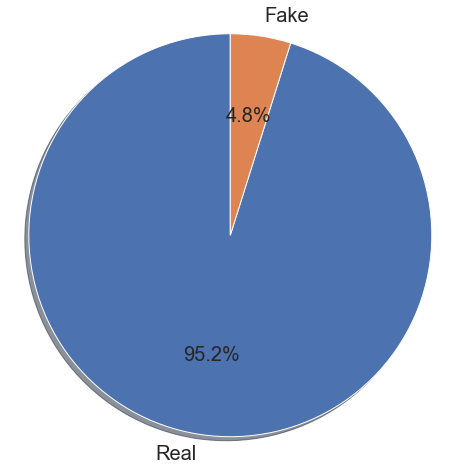

In [115]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
Labels = 'Real', 'Fake'
sizes = [17014, 866]

fig1, ax1 = plt.subplots(figsize=(8,8))
_ = ax1.pie(sizes, labels=  Labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20})
_ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

_ = plt.show()

In [116]:
Job_postings.columns

Index(['title', 'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'word_count_d', 'word_count_t', 'word_count_cp',
       'word_count_b', 'word_count_r', 'char_count_d', 'char_count_r',
       'char_count_b', 'char_count_t', 'char_count_cp', 'word_density_d',
       'word_density_cp', 'word_density_r', 'word_density_t', 'word_density_b',
       'description1', 'title1', 'requirements1', 'benefits1',
       'company_profile1'],
      dtype='object')

## Split Data to Train -Test Data to run forward feature selection 

In [117]:
# Features and Labels
X = Job_postings[[
        
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function', 'word_count_d', 'word_count_t', 'word_count_cp',
       'word_count_b', 'word_count_r', 'char_count_d', 'char_count_r',
       'char_count_b', 'char_count_t', 'char_count_cp', 'word_density_d',
       'word_density_cp', 'word_density_r', 'word_density_t', 'word_density_b',
       
        ]]
y = Job_postings['fraudulent']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Forward Feature Selection

We wish to seek out only the important encoded and numeric features to run the model analysis and to deploy the relevant Machine Learning algorithms.

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [119]:
## Flag intermediate output

show_steps = False  # for testing/debugging
# show_steps = False  # without showing steps

In [120]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit (X_train[included + [new_column]], y_train)# fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score (X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1- ( ( (1-r2) * (n-1) )/(n-k-1) )# calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                    (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature has_company_logo with R^2 = 0.068 and adjusted R^2 = 0.068
Added feature word_density_cp with R^2 = 0.080 and adjusted R^2 = 0.079
Added feature has_questions with R^2 = 0.082 and adjusted R^2 = 0.081
Added feature word_count_t with R^2 = 0.083 and adjusted R^2 = 0.082
Added feature function with R^2 = 0.085 and adjusted R^2 = 0.084
Added feature required_education with R^2 = 0.087 and adjusted R^2 = 0.086
Added feature char_count_b with R^2 = 0.089 and adjusted R^2 = 0.087
Added feature industry with R^2 = 0.091 and adjusted R^2 = 0.089
Added feature telecommuting with R^2 = 0.091 and adjusted R^2 = 0.089
Added feature word_count_r with R^2 = 0.092 and adjusted R^2 = 0.089
Added feature word_density_r with R^2 = 0.092 and adjusted R^2 = 0.090
Added feature required_experience with R^2 = 0.093 and adjusted R^2 = 0.090

Resulting features:
has_company_logo, word_density_cp, has_questions, word_count_t, function, required_education, char_count_b, industry, telecommuting, wo

In [121]:
Job_postings.drop(['employment_type','word_count_d','word_count_cp',  'word_count_b','char_count_d','char_count_r','char_count_t',
                  'char_count_cp','word_density_d','word_density_t','word_density_b','title', 'company_profile', 'description', 'requirements', 'benefits'], axis=1, inplace= True)




In [122]:
Job_postings.shape

(17880, 18)

In [123]:
Job_postings.columns

Index(['telecommuting', 'has_company_logo', 'has_questions',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'word_count_t', 'word_count_r', 'char_count_b',
       'word_density_cp', 'word_density_r', 'description1', 'title1',
       'requirements1', 'benefits1', 'company_profile1'],
      dtype='object')

## Set Feature Variables 

In [124]:
predictor_columns = [
        'telecommuting', 'has_company_logo', 'has_questions',
       'required_experience', 'required_education', 'industry', 'function',
       'word_count_t', 'word_count_r', 'char_count_b',
       'word_density_cp', 'word_density_r', 'description1', 'title1',
       'requirements1', 'benefits1', 'company_profile1'
        ]

In [125]:
X = Job_postings[predictor_columns]
X.head()

,telecommuting,has_company_logo,has_questions,required_experience,required_education,industry,function,word_count_t,word_count_r,char_count_b,word_density_cp,word_density_r,description1,title1,requirements1,benefits1,company_profile1
5,0,1,0,5,0,0,23,2,115,0,5.035461,6.217391,f o o d f a s t g r o w i n g j a m e s ...,m a r k e t i n g i n t e r n,e x p e r i e n c e c o n t e n t m a n a ...,,f o o d w e v e c r e a t e d g r o u n ...
6,0,1,0,7,0,76,8,6,187,1022,6.060000,6.267380,o r g a n i s e d f o c u s e d v i b r a ...,c u s t o m e r s e r v i c e c l o u d ...,e x p e c t y o u y o u r k e y r e s p ...,g e t u s t h r o u g h p a r t s e c o ...,s e c o n d s w o r l d s c l o u d v i ...
7,0,1,0,0,0,0,0,4,164,0,5.352941,7.152439,c l i e n t l o c a t e d h o u s t o n ...,c o m m i s s i o n i n g m a c h i n e r y ...,i m p l e m e n t p r e c o m m i s s i o n ...,,v a l o r s e r v i c e s p r o v i d e s ...
8,0,1,0,6,2,23,32,5,174,669,5.988235,7.057471,c o m p a n y e s r i e n v i r o n m e n ...,a c c o u n t e x e c u t i v e w a s h i ...,e d u c a t i o n b a c h e l o r s m a s ...,c u l t u r e a n y t h i n g c o r p o r ...,p a s s i o n i m p r o v i n g q u a l i ...
9,0,1,1,6,2,52,17,3,89,19,6.473171,7.337079,j o b t i t l e i t e m i z a t i o n r ...,b i l l r e v i e w m a n a g e r,q u a l i f i c a t i o n s r n l i c e n s ...,f u l l b e n e f i t s o f f e r e d,s p o t s o u r c e s o l u t i o n s l l ...


## Set Target Variable

We have a case of unbalance target class with only 4.8% representing fake job posters out of the whole dataset. We may need to try up-sampling the minority class of fradulent variable by randomly duplicating observations from the the class in order to reinforce its signal.

In [126]:

from sklearn.utils import resample

In [127]:

# Separate majority and minority classes
fraudulent_majority = Job_postings[Job_postings['fraudulent'] == 0]
fraudulent_minority = Job_postings[Job_postings['fraudulent'] == 1]
 
# Upsample minority class
fraudulent_minority_upsampled = resample(fraudulent_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17014,    # to match majority class
                                 random_state=1) # reproducible results
 



In [128]:
fraudulent_minority_upsampled

,telecommuting,has_company_logo,has_questions,required_experience,required_education,industry,function,fraudulent,word_count_t,word_count_r,char_count_b,word_density_cp,word_density_r,description1,title1,requirements1,benefits1,company_profile1
1705,0,0,0,0,0,68,0,1,4,17,119,0.000000,7.058824,u l t r a l u x u r y a m e r i c a n c ...,c r u i s e s t a f f w a n t e d u r g ...,c e r t i f i c a t i o n a m p e x p e r ...,b e n e f i t s b o a r d e n s u i t e ...,
5693,0,0,0,3,5,120,8,1,3,22,131,0.000000,8.045455,d u t i e s r e s p o n s i b i l i t i e s ...,c a l l c e n t e r r e p r e s e n t a t ...,q u a l i f i c a t i o n s h i g h s c h o ...,c o m p e n s a t i o n b e n e f i t s p a ...,
2384,0,0,0,3,5,27,1,1,2,39,131,0.000000,7.717949,p r o f e s s i o n a l l y c o u r t e o u ...,a d m i n i s t r a t i v e a s s i s t a n ...,m i n i m u m q u a l i f i c a t i o n s h ...,c o m p e n s a t i o n b e n e f i t s p a ...,
17738,0,0,0,3,5,40,2,1,7,84,542,0.000000,7.988095,p r e p a r i n g s o r t s s o u r c e ...,p a y r o l l p r o c e s s o r e n t r y ...,m i n i m u m q u a l i f i c a t i o n s ...,f o l l o w s s e t p r o c e d u r e s ...,
17686,0,0,0,0,0,0,0,1,2,26,0,0.000000,6.115385,e n g i n e e r i n g e m p l o y e e o w ...,m a n u f a c t u r i n g e n g i n e e r,q u a l i f i e d a p p l i c a n t s b s ...,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17812,0,1,0,3,5,27,8,1,5,7,0,0.000000,3.428571,l o o k i n g s e l f m o t i v a t e d i ...,r e m o t e d a t a e n t r y r e p n ...,m u s t a b l e w o r k h o m e,,
5931,0,0,0,0,0,40,14,1,2,63,297,0.000000,4.936508,l o o k i n g a s s i s t a n t a c c o u ...,a s s i s t a n t a c c o u n t a n t,i d e a l c a n d i d a t e f o l l o w i ...,s u c c e s s f u l c a n d i d a t e m u ...,
942,0,1,1,6,2,89,24,1,4,269,145,6.532374,7.624535,,h e a l t h e n v i r o n m e n t a l p r ...,r e s p o n s i b i l i t i e s d u t i e s ...,p l e a s e a p p l y i m m e d i a t e ...,a p t i t u d e s t a f f i n g s o l u t ...
6554,0,0,0,0,0,0,0,1,11,1,0,0.000000,0.000000,d e m a n d l o o k i n g p e o p l e q ...,l o o k i n g g o g e t t e r s w a n t ...,,,


In [129]:
# Combine majority class with upsampled minority class
fraudulent_upsampled = pd.concat([fraudulent_majority, fraudulent_minority_upsampled])
 # Display new class counts
fraudulent_upsampled.fraudulent.value_counts()

1    17014
0    17014
Name: fraudulent, dtype: int64

In [130]:
# Separate majority and minority classes
fraudulent_majority = Job_postings[Job_postings['fraudulent'] == 0]
fraudulent_minority = Job_postings[Job_postings['fraudulent'] == 1]
 

In [131]:
y=fraudulent_upsampled['fraudulent'].sample(n=17880)

In [132]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [133]:
y.shape

(17880,)

# Feature Engineering

## Count Vectorization 

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

In [135]:
#text columns:'description1', 'title1','requirements1', 'benefits1', 'company_profile1'

-Description transformed into count vector

In [136]:
counts = CountVectorizer()

In [137]:
# create a matrix of word counts from the text

X = Job_postings['description1']
y= fraudulent_upsampled['fraudulent'].sample(n=17880)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14304,)
(3576,)
(14304,)
(3576,)


In [138]:
counts= CountVectorizer(token_pattern = r'\w{1,}')

In [139]:

# Learn a vocabulary dictionary of all tokens in the raw documents
counts.fit(X)

# Transform documents to document-term matrix.
X_train_count = counts.transform(X_train)
X_test_count = counts.transform(X_test)

print(X_train_count.shape)
print(X_test_count.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 26)
(3576, 26)
(14304,)
(3576,)


In [140]:
df_train_d=pd.DataFrame(X_train_count.todense(),columns=counts.get_feature_names())

In [141]:
df_test_d=pd.DataFrame(X_test_count.todense(),columns=counts.get_feature_names())

In [142]:
df_test_d

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,41,7,24,15,67,5,19,17,31,1,...,1,31,48,39,15,6,11,3,11,1
1,120,14,91,40,243,18,40,20,161,0,...,2,135,197,180,58,38,12,9,14,6
2,28,6,10,17,66,3,16,7,41,0,...,0,25,32,37,9,12,8,1,3,1
3,84,15,46,46,132,11,45,15,98,2,...,1,84,93,88,31,7,8,4,11,0
4,24,12,18,24,67,4,11,7,40,0,...,0,36,31,28,18,6,7,2,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,73,7,48,38,114,11,21,12,89,2,...,3,67,64,81,36,15,6,3,19,4
3572,64,15,52,47,154,16,24,18,69,1,...,2,61,75,70,34,17,19,3,14,1
3573,29,4,18,7,49,9,6,10,34,1,...,0,31,27,24,6,6,3,1,9,0
3574,70,6,32,18,102,23,19,8,65,0,...,0,59,61,56,19,7,11,3,12,1


After the fitting and transformation of text column/feature of description1, we will go ahead to fit and transform the following feature of title1 and so forth

-Title feature as count vector

In [143]:

X = Job_postings['title1']
y= fraudulent_upsampled['fraudulent'].sample(n=17880)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Learn a vocabulary dictionary of all tokens in the raw documents
counts.fit(X)

# Transform documents to document-term matrix.
X_train_count_1 = counts.transform(X_train)
X_test_count_1 = counts.transform(X_test)

print(X_train_count_1.shape)
print(X_test_count_1.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 26)
(3576, 26)
(14304,)
(3576,)


In [144]:
df_train_t=pd.DataFrame(X_train_count_1.todense(),columns=counts.get_feature_names())
df_test_t=pd.DataFrame(X_test_count_1.todense(),columns=counts.get_feature_names())

In [145]:
text_train_1 =pd.concat([df_train_d, df_train_t],axis=1)
text_test_1 =pd.concat([df_test_d, df_test_t],axis=1)

-Requirements as count vector

In [146]:
X = Job_postings['requirements1']
y= fraudulent_upsampled['fraudulent'].sample(n=17880)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Learn a vocabulary dictionary of all tokens in the raw documents
counts.fit(X)

# Transform documents to document-term matrix.
X_train_count_2 = counts.transform(X_train)
X_test_count_2 = counts.transform(X_test)

print(X_train_count_2.shape)
print(X_test_count_2.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 26)
(3576, 26)
(14304,)
(3576,)


In [147]:
df_train_r=pd.DataFrame(X_train_count_2.todense(),columns=counts.get_feature_names())
df_test_r=pd.DataFrame(X_test_count_2.todense(),columns=counts.get_feature_names())

In [148]:
text_train_2 =pd.concat([text_train_1, df_train_r],axis=1)
text_test_2 =pd.concat([text_test_1, df_test_r],axis=1)

-Add company profile text column as count vector 

In [149]:
X = Job_postings['company_profile1']
y= fraudulent_upsampled['fraudulent'].sample(n=17880)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Learn a vocabulary dictionary of all tokens in the raw documents
counts.fit(X)

# Transform documents to document-term matrix.
X_train_count_3 = counts.transform(X_train)
X_test_count_3 = counts.transform(X_test)

print(X_train_count_3.shape)
print(X_test_count_3.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 26)
(3576, 26)
(14304,)
(3576,)


In [150]:
df_train_cp=pd.DataFrame(X_train_count_3.todense(),columns=counts.get_feature_names())
df_test_cp=pd.DataFrame(X_test_count_3.todense(),columns=counts.get_feature_names())

In [151]:
text_train_3 =pd.concat([text_train_2, df_train_cp],axis=1)
text_test_3 =pd.concat([text_test_2, df_test_cp],axis=1)

-Transform final text column of benefits as count vector for modelling

In [152]:
X = Job_postings['benefits1']
y= fraudulent_upsampled['fraudulent'].sample(n=17880)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Learn a vocabulary dictionary of all tokens in the raw documents
counts.fit(X)

# Transform documents to document-term matrix.
X_train_count_4 = counts.transform(X_train)
X_test_count_4 = counts.transform(X_test)

print(X_train_count_4.shape)
print(X_test_count_4.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 26)
(3576, 26)
(14304,)
(3576,)


In [153]:
df_train_b=pd.DataFrame(X_train_count_4.todense(),columns=counts.get_feature_names())
df_test_b=pd.DataFrame(X_test_count_4.todense(),columns=counts.get_feature_names())

In [154]:
text_train_4 =pd.concat([text_train_3, df_train_cp],axis=1)
text_test_4 =pd.concat([text_test_3, df_test_cp],axis=1)

In [155]:
df_train_b

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,15,1,7,4,28,3,3,6,11,0,...,0,12,15,21,7,3,5,2,8,0
1,55,9,38,26,73,9,16,6,67,1,...,0,50,50,53,28,9,5,2,12,0
2,9,1,9,9,13,4,3,5,8,0,...,0,8,11,11,2,1,3,0,5,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,4,1,5,2,10,0,4,2,9,0,...,0,6,6,7,3,1,3,0,3,1
14300,12,7,7,2,18,5,3,3,7,0,...,0,7,6,11,1,1,1,0,0,1
14301,21,6,19,16,38,5,3,5,22,0,...,2,19,24,19,11,9,0,1,4,0
14302,2,0,1,0,4,0,0,1,2,0,...,0,3,1,4,1,1,0,0,1,0


# Modelling on multiple text columns- Text columns as predictors

In [156]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_test)

In [157]:
results = pd.DataFrame(columns = ['Desc','Desc+Title','Desc+Title+Req','Desc+Title+Req+cp','Desc+Title+Req+cp+Benefits'
                        ])

In [158]:
from sklearn.metrics import accuracy_score

## Support Vector Machine Model with Text Columns as predictors

In [159]:
%%time
from sklearn.svm import LinearSVC

accuracy1 = train_model(LinearSVC(), df_train_d , y_train, df_test_d)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

SVM, Count Vectors    : 0.5126

CPU times: user 1.82 s, sys: 4.13 ms, total: 1.83 s
Wall time: 1.82 s


In [160]:
%%time
from sklearn.svm import LinearSVC

accuracy2 = train_model(LinearSVC(), text_train_1 , y_train, text_test_1)
print('SVM, Count Vectors    : %.4f\n' % accuracy2)

SVM, Count Vectors    : 0.4899

CPU times: user 2.81 s, sys: 72.2 ms, total: 2.88 s
Wall time: 2.3 s


In [161]:
%%time
from sklearn.svm import LinearSVC

accuracy3 = train_model(LinearSVC(), text_train_2 , y_train, text_test_2)
print('SVM, Count Vectors    : %.4f\n' % accuracy3)

SVM, Count Vectors    : 0.5117

CPU times: user 3.76 s, sys: 78 ms, total: 3.83 s
Wall time: 3.25 s


In [162]:
%%time
from sklearn.svm import LinearSVC

accuracy4 = train_model(LinearSVC(), text_train_3 , y_train, text_test_3)
print('SVM, Count Vectors    : %.4f\n' % accuracy4)

SVM, Count Vectors    : 0.5131

CPU times: user 4.37 s, sys: 77.1 ms, total: 4.45 s
Wall time: 3.87 s


### Using cocatendated dataframes of all 5 text columns to run SVM

In [163]:
%%time
from sklearn.svm import LinearSVC

accuracy5 = train_model(LinearSVC(), text_train_4 , y_train, text_test_4)
print('SVM, Count Vectors    : %.4f\n' % accuracy5)

SVM, Count Vectors    : 0.4824

CPU times: user 4.92 s, sys: 101 ms, total: 5.02 s
Wall time: 4.46 s


In [164]:
results.loc['SVM'] = {
    'Desc': accuracy1,
    'Desc+Title': accuracy2,
    'Desc+Title+Req': accuracy3,
    'Desc+Title+Req+cp': accuracy4,
'Desc+Title+Req+cp+Benefits': accuracy5}

## Logistic Regression Model with Text Columns as predictors

In [165]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [166]:
%%time
# Linear Classifier on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), df_train_d , y_train, df_test_d)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

LR, Count Vectors    : 0.4994

CPU times: user 402 ms, sys: 36.4 ms, total: 438 ms
Wall time: 110 ms


In [167]:
%%time
# Linear Classifier on Count Vectors
accuracy2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), text_train_1, y_train, text_test_1)
print('LR, Count Vectors    : %.4f\n' % accuracy2)

LR, Count Vectors    : 0.5126

CPU times: user 1.45 s, sys: 111 ms, total: 1.57 s
Wall time: 392 ms


In [168]:
%time
# Linear Classifier on Count Vectors
accuracy3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), text_train_2, y_train, text_test_2)
print('LR, Count Vectors    : %.4f\n' % accuracy3)

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 4.05 µs
LR, Count Vectors    : 0.4969



In [169]:
%time
# Linear Classifier on Count Vectors
accuracy4 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), text_train_3, y_train, text_test_3)
print('LR, Count Vectors    : %.4f\n' % accuracy4)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 4.05 µs
LR, Count Vectors    : 0.4952



### Using cocatendated dataframes of all 5 text columns to run Logistic Regression

In [170]:
%time
# Linear Classifier on Count Vectors
accuracy5 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), text_train_4, y_train, text_test_4)
print('LR, Count Vectors    : %.4f\n' % accuracy5)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 4.29 µs
LR, Count Vectors    : 0.4927



In [171]:
results.loc['Logreg'] = {
    'Desc': accuracy1,
    'Desc+Title': accuracy2,
    'Desc+Title+Req': accuracy3,
    'Desc+Title+Req+cp': accuracy4,
'Desc+Title+Req+cp+Benefits': accuracy5}

## Naive Bayes Classifier-with text columns as predictors

In [172]:
from sklearn.naive_bayes import MultinomialNB

In [173]:
%%time
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(),  df_train_d, y_train, df_test_d)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

NB, Count Vectors    : 0.5076

CPU times: user 33.8 ms, sys: 5.98 ms, total: 39.7 ms
Wall time: 10.4 ms


In [174]:
%%time
# Naive Bayes on Count Vectors
accuracy2 = train_model(MultinomialNB(),  text_train_1, y_train, text_test_1)
print('NB, Count Vectors    : %.4f\n' % accuracy2)

NB, Count Vectors    : 0.5145

CPU times: user 32.2 ms, sys: 5.23 ms, total: 37.4 ms
Wall time: 9.22 ms


In [175]:
%%time
# Naive Bayes on Count Vectors
accuracy3 = train_model(MultinomialNB(),  text_train_2, y_train, text_test_2)
print('NB, Count Vectors    : %.4f\n' % accuracy3)

NB, Count Vectors    : 0.4751

CPU times: user 37.6 ms, sys: 5.9 ms, total: 43.5 ms
Wall time: 10.8 ms


In [176]:
%%time
# Naive Bayes on Count Vectors
accuracy4 = train_model(MultinomialNB(),  text_train_3, y_train, text_test_3)
print('NB, Count Vectors    : %.4f\n' % accuracy4)

NB, Count Vectors    : 0.4720

CPU times: user 47.9 ms, sys: 9.26 ms, total: 57.2 ms
Wall time: 14.8 ms


### Using cocatendated dataframes of all 5 text columns to run Naive Bayes 

In [177]:
%%time
# Naive Bayes on Count Vectors
accuracy5= train_model(MultinomialNB(),  text_train_4, y_train, text_test_4)
print('NB, Count Vectors    : %.4f\n' % accuracy5)

NB, Count Vectors    : 0.4726

CPU times: user 62.7 ms, sys: 13.6 ms, total: 76.3 ms
Wall time: 19.6 ms


In [178]:
results.loc['Naive Bayes'] = {
    'Desc': accuracy1,
    'Desc+Title': accuracy2,
    'Desc+Title+Req': accuracy3,
    'Desc+Title+Req+cp': accuracy4,
'Desc+Title+Req+cp+Benefits': accuracy5}

## Boosting Model- with text column as predictors 

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

In [180]:

# Gradient Boosting on Count Vectors
accuracy1 = train_model(GradientBoostingClassifier(), df_train_d, y_train, df_test_d)
print('GB, Count Vectors    : %.4f\n' % accuracy1)

GB, Count Vectors    : 0.5126



In [181]:

# Gradient Boosting on Count Vectors
accuracy2 = train_model(GradientBoostingClassifier(), text_train_1, y_train, text_test_1)
print('GB, Count Vectors    : %.4f\n' % accuracy2)

GB, Count Vectors    : 0.5129



In [182]:
# Gradient Boosting on Count Vectors
accuracy3 = train_model(GradientBoostingClassifier(), text_train_2, y_train, text_test_2)
print('GB, Count Vectors    : %.4f\n' % accuracy3)

GB, Count Vectors    : 0.5076



In [183]:
# Gradient Boosting on Count Vectors
accuracy4 = train_model(GradientBoostingClassifier(), text_train_3, y_train, text_test_3)
print('GB, Count Vectors    : %.4f\n' % accuracy4)

GB, Count Vectors    : 0.5008



### Using cocatendated dataframes of all 5 text columns to run Boosting

In [184]:
# Gradient Boosting on Count Vectors
accuracy5 = train_model(GradientBoostingClassifier(), text_train_4, y_train, text_test_4)
print('GB, Count Vectors    : %.4f\n' % accuracy5)

GB, Count Vectors    : 0.5011



In [185]:
results.loc['Gradient Boost'] = {
    'Desc': accuracy1,
    'Desc+Title': accuracy2,
    'Desc+Title+Req': accuracy3,
    'Desc+Title+Req+cp': accuracy4,
'Desc+Title+Req+cp+Benefits': accuracy5}

In [186]:
results

,Desc,Desc+Title,Desc+Title+Req,Desc+Title+Req+cp,Desc+Title+Req+cp+Benefits
SVM,0.512584,0.489933,0.511745,0.513143,0.482383
Logreg,0.499441,0.512584,0.496924,0.495246,0.492729
Naive Bayes,0.507550,0.514541,0.475112,0.472036,0.472595
Gradient Boost,0.512584,0.512864,0.507550,0.500839,0.501119


We can note that if we solely input the text columns as our predictors to classify our fraudulent job postings, the accuracy metrics are on the lower points. The highest accuracy level is only 53.2% when we run logistic regression on all the 5 text columns of description, job title, requirements, company profile and benefits.

# Modeling - Forward Feature Selection Variables  

In [187]:
text_train_4.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,55,14,24,23,85,15,21,9,49,1,...,0,10,11,11,4,6,3,0,1,0
1,30,5,9,10,30,1,10,3,29,1,...,2,32,33,36,15,4,5,1,6,0
2,114,20,56,38,117,30,31,23,107,1,...,0,36,45,35,20,6,5,1,4,0
3,48,6,18,13,70,8,16,10,44,3,...,1,20,29,20,11,9,0,0,3,0
4,44,8,38,13,89,6,33,7,75,2,...,1,8,7,11,7,1,0,0,3,0


In [188]:
Job_postings.columns

Index(['telecommuting', 'has_company_logo', 'has_questions',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'word_count_t', 'word_count_r', 'char_count_b',
       'word_density_cp', 'word_density_r', 'description1', 'title1',
       'requirements1', 'benefits1', 'company_profile1'],
      dtype='object')

In [189]:
Job_postings.drop(['description1', 'title1','requirements1', 'benefits1', 'company_profile1','fraudulent'], axis=1,inplace= True)
main_df = pd.concat([Job_postings,text_train_4], axis =1)

In [190]:
main_df.shape

(17885, 142)

In [191]:
fraudulent_upsampled['fraudulent'].sample(100)

8431     0
3534     0
491      0
17584    1
9754     1
        ..
4754     1
2956     0
7847     0
1222     1
5063     1
Name: fraudulent, Length: 100, dtype: int64

In [192]:
Fraud= fraudulent_upsampled['fraudulent'].sample(n=17880)
main_df = main_df.join(Fraud)

In [193]:
main_df.head()

,telecommuting,has_company_logo,has_questions,required_experience,required_education,industry,function,word_count_t,word_count_r,char_count_b,...,r,s,t,u,v,w,x,y,z,fraudulent
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,11.0,11.0,4.0,6.0,3.0,0.0,1.0,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,33.0,36.0,15.0,4.0,5.0,1.0,6.0,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,45.0,35.0,20.0,6.0,5.0,1.0,4.0,0.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,29.0,20.0,11.0,9.0,0.0,0.0,3.0,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,7.0,11.0,7.0,1.0,0.0,0.0,3.0,0.0,NaN


In [194]:
main_df.columns.values.tolist()

['telecommuting',
 'has_company_logo',
 'has_questions',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'word_count_t',
 'word_count_r',
 'char_count_b',
 'word_density_cp',
 'word_density_r',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',


In [195]:
y = main_df['fraudulent']


In [196]:
main_df.iloc[:,:-1]

,telecommuting,has_company_logo,has_questions,required_experience,required_education,industry,function,word_count_t,word_count_r,char_count_b,...,q,r,s,t,u,v,w,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,10.0,11.0,11.0,4.0,6.0,3.0,0.0,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,32.0,33.0,36.0,15.0,4.0,5.0,1.0,6.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,36.0,45.0,35.0,20.0,6.0,5.0,1.0,4.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,20.0,29.0,20.0,11.0,9.0,0.0,0.0,3.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,8.0,7.0,11.0,7.0,1.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17880,0.0,1.0,1.0,6.0,0.0,23.0,32.0,4.0,180.0,668.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17881,0.0,1.0,1.0,6.0,2.0,62.0,1.0,2.0,107.0,440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,155.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17883,0.0,0.0,1.0,7.0,7.0,49.0,10.0,2.0,86.0,177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
X = main_df.iloc[:,:-1]

In [198]:
main_df.fraudulent.value_counts()

1.0    8972
0.0    8908
Name: fraudulent, dtype: int64

In [199]:
X

,telecommuting,has_company_logo,has_questions,required_experience,required_education,industry,function,word_count_t,word_count_r,char_count_b,...,q,r,s,t,u,v,w,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,10.0,11.0,11.0,4.0,6.0,3.0,0.0,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,32.0,33.0,36.0,15.0,4.0,5.0,1.0,6.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,36.0,45.0,35.0,20.0,6.0,5.0,1.0,4.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,20.0,29.0,20.0,11.0,9.0,0.0,0.0,3.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,8.0,7.0,11.0,7.0,1.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17880,0.0,1.0,1.0,6.0,0.0,23.0,32.0,4.0,180.0,668.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17881,0.0,1.0,1.0,6.0,2.0,62.0,1.0,2.0,107.0,440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,155.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17883,0.0,0.0,1.0,7.0,7.0,49.0,10.0,2.0,86.0,177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [201]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [202]:
main_df.isnull().sum()

telecommuting             5
has_company_logo          5
has_questions             5
required_experience       5
required_education        5
                       ... 
w                      6780
x                      6780
y                      6780
z                      6780
fraudulent             8111
Length: 143, dtype: int64

In [203]:
print(main_df.isnull().any())

telecommuting          True
has_company_logo       True
has_questions          True
required_experience    True
required_education     True
                       ... 
w                      True
x                      True
y                      True
z                      True
fraudulent             True
Length: 143, dtype: bool


In [204]:
main_df = main_df.dropna()

In [205]:
main_df

,telecommuting,has_company_logo,has_questions,required_experience,required_education,industry,function,word_count_t,word_count_r,char_count_b,...,r,s,t,u,v,w,x,y,z,fraudulent
5,0.0,1.0,0.0,5.0,0.0,0.0,23.0,2.0,115.0,0.0,...,3.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,7.0,0.0,76.0,8.0,6.0,187.0,1022.0,...,3.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,164.0,0.0,...,21.0,33.0,25.0,17.0,7.0,3.0,1.0,6.0,0.0,0.0
8,0.0,1.0,0.0,6.0,2.0,23.0,32.0,5.0,174.0,669.0,...,63.0,67.0,58.0,25.0,9.0,19.0,3.0,19.0,0.0,0.0
11,0.0,1.0,1.0,6.0,6.0,90.0,21.0,4.0,77.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14297,0.0,0.0,0.0,0.0,0.0,112.0,0.0,3.0,1.0,0.0,...,20.0,24.0,30.0,10.0,11.0,3.0,0.0,6.0,0.0,0.0
14299,0.0,1.0,0.0,3.0,5.0,35.0,0.0,1.0,57.0,177.0,...,15.0,15.0,19.0,8.0,3.0,2.0,2.0,4.0,0.0,0.0
14300,0.0,1.0,0.0,6.0,2.0,105.0,19.0,3.0,330.0,0.0,...,18.0,13.0,16.0,3.0,5.0,5.0,1.0,2.0,0.0,0.0
14302,0.0,1.0,1.0,0.0,5.0,9.0,16.0,3.0,13.0,199.0,...,14.0,8.0,14.0,3.0,2.0,4.0,2.0,2.0,1.0,0.0


In [206]:
X = main_df.iloc[:,:-1]
y = main_df['fraudulent']



In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# SVM Model

In [208]:
%%time
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 11.7 µs


In [209]:
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
scores = cross_val_score(model_svm, X_train, y_train, cv=10, scoring='accuracy')

print(scores.mean())

0.6056906986158868


In [210]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [211]:
#confusion matrix 
y_pred = model_svm.predict (X_test)
print(metrics.confusion_matrix(y_test,y_pred))

[[1887  238]
 [1191  472]]


True Positives (TP): we correctly predicted the fake job listings
351.
True Negatives (TN): we correctly predicted the real postings
1997.
False Positives (FP): we incorrectly predicted the fake job listings
188.
False Negatives (FN): we incorrectly predicted the real listings 1243

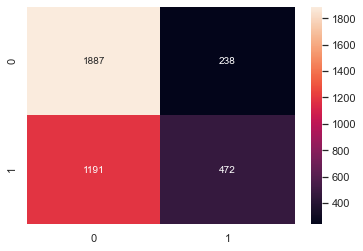

In [212]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d");

# Logistic Regression 

In [213]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [214]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')

print(scores.mean())

0.7374964769425498


In [215]:
#confusion matrix 
y_pred = logreg.predict (X_test)
print(metrics.confusion_matrix(y_test,y_pred))

[[1705  420]
 [ 574 1089]]


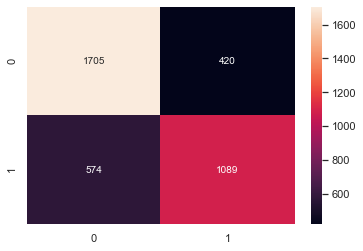

In [216]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d");

# Naive Bayes Classifier

In [217]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)



scores = cross_val_score(model_nb, X_train, y_train, cv=10, scoring='accuracy')

print(scores.mean())

0.5729846830273184


In [218]:
#confusion matrix 
y_pred = model_nb.predict (X_test)
print(metrics.confusion_matrix(y_test,y_pred))

[[1424  701]
 [ 966  697]]


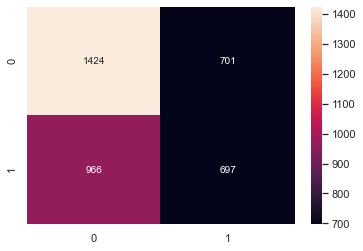

In [219]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d");

# Gradient Boosting

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
model_b =GradientBoostingClassifier()

In [221]:
model_b =GradientBoostingClassifier()
model_b.fit(X_train, y_train)



scores = cross_val_score(model_b, X_train, y_train, cv=10, scoring='accuracy')

print(scores.mean())

0.9064243913437838


In [232]:
#confusion matrix 
y_pred = model_b.predict (X_test)
print(metrics.confusion_matrix(y_test,y_pred))

[[1916  209]
 [ 127 1536]]


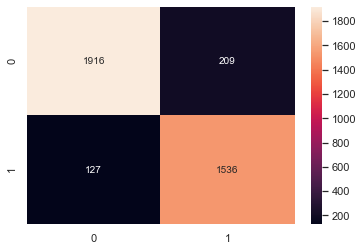

In [233]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d");

# Evaluation of Models-Training Sets


In [224]:
# Evaluate model against training set
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)
#results in pd df

results = pd.DataFrame (columns = ['Model', 'Accuracy', 'Precision','Recall','ROC_AUC'])

********
* SVM *
********
Accuracy : 0.6363 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6669 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2933 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5922                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


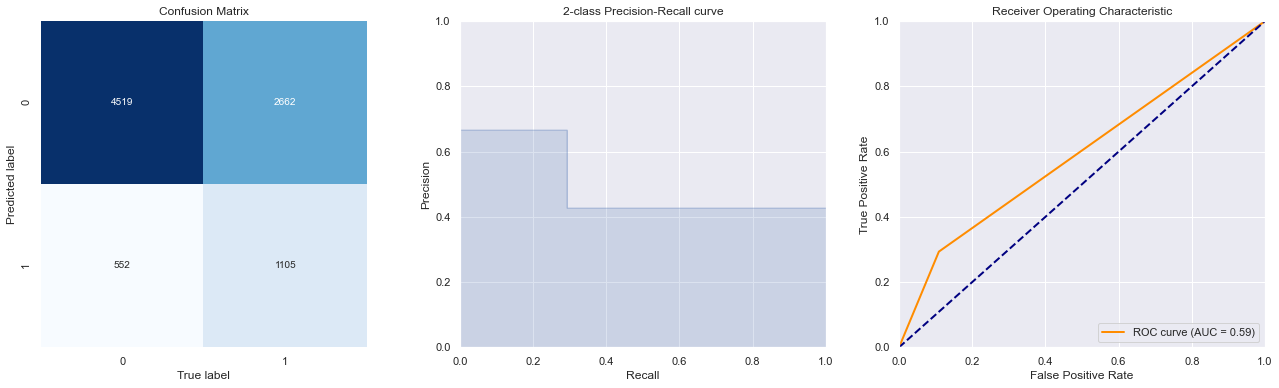

*************
* Logistic *
*************
Accuracy : 0.7441 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7187 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6565 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7328                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


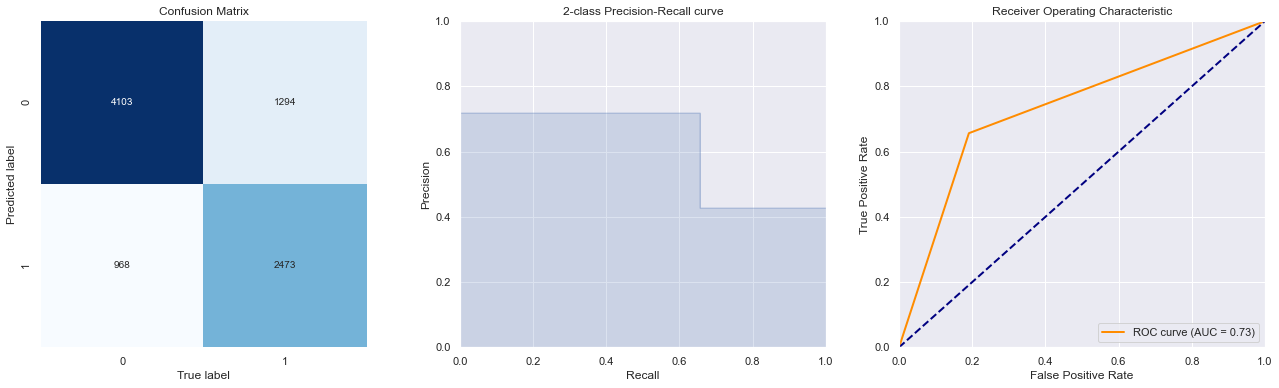

****************
* Naive Bayes *
****************
Accuracy : 0.5765 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5037 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4346 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5582                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


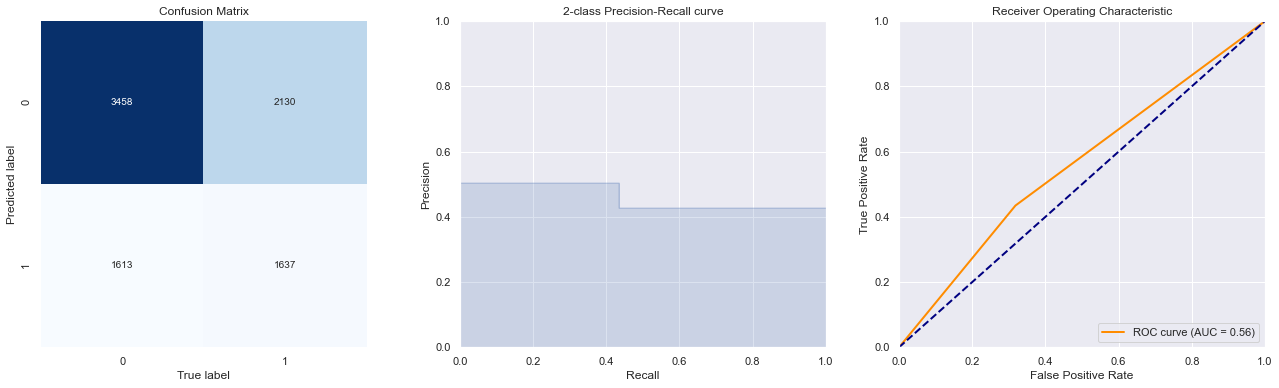

*************
* Boosting *
*************
Accuracy : 0.9176 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8815 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9320 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9195                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


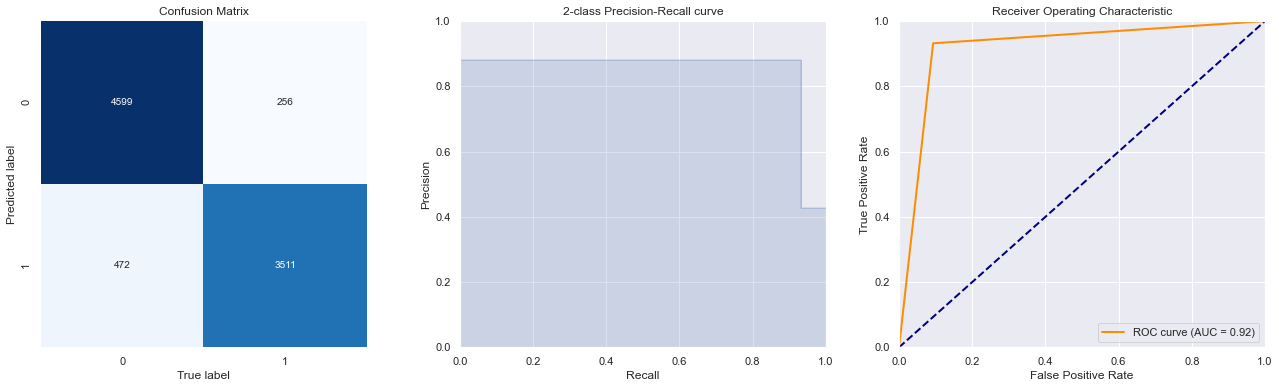

In [225]:
models = ['SVM','Logistic','Naive Bayes','Boosting']
for i, m in enumerate ([model_svm,logreg,model_nb,model_b]):
    print('*' * (len(models[i]) + 5))
    print('* %s *' %models[i])
    print('*' * (len(models[i]) + 5))
    predictions = m.predict(X_train)
    
    #show report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    
    results.loc[i] = {'Model':models[i],
                  'Accuracy':accuracy_, 
                  'Precision': precision_, 
                  'Recall': recall_, 
                  'ROC_AUC': roc_auc_}

In [226]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,SVM,0.636343,0.666868,0.293337,0.592241
1,Logistic,0.744060,0.718686,0.656491,0.732801
2,Naive Bayes,0.576488,0.503692,0.434563,0.558240
3,Boosting,0.917628,0.881496,0.932041,0.919482


# Evaluation of Test Sets

In [227]:
predictions = model_svm.predict(X_test)

Accuracy : 0.6228 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6648 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2838 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5859                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


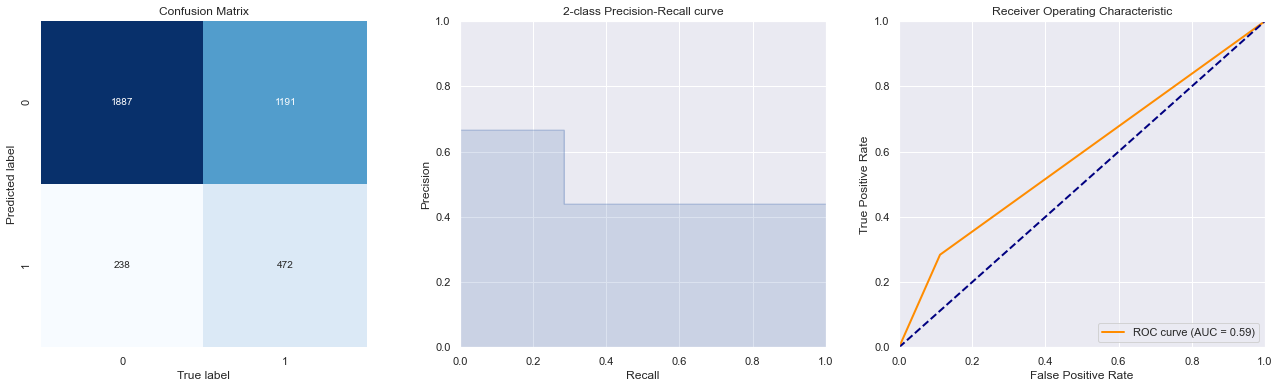

In [228]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)

Accuracy : 0.7376 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7217 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6548 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7286                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


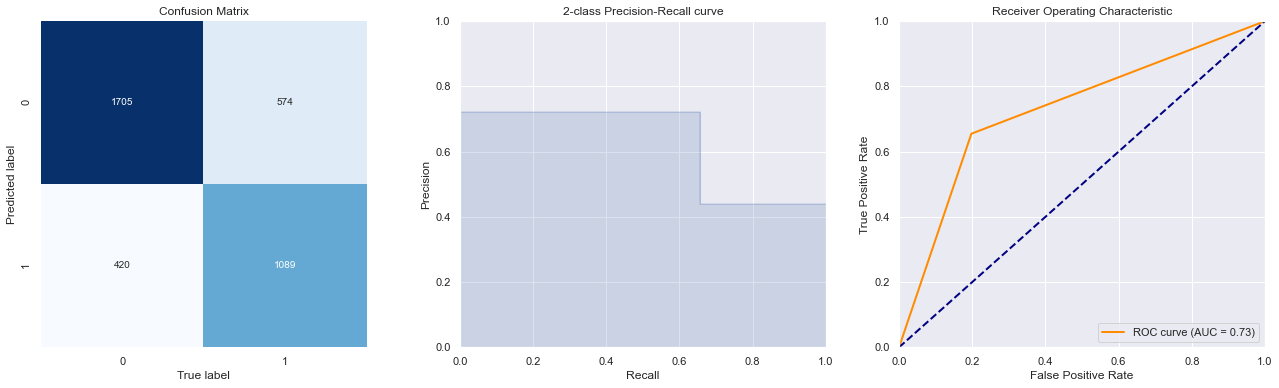

In [229]:
predictions = logreg.predict(X_test)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)

Accuracy : 0.5599 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4986 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4191 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5446                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


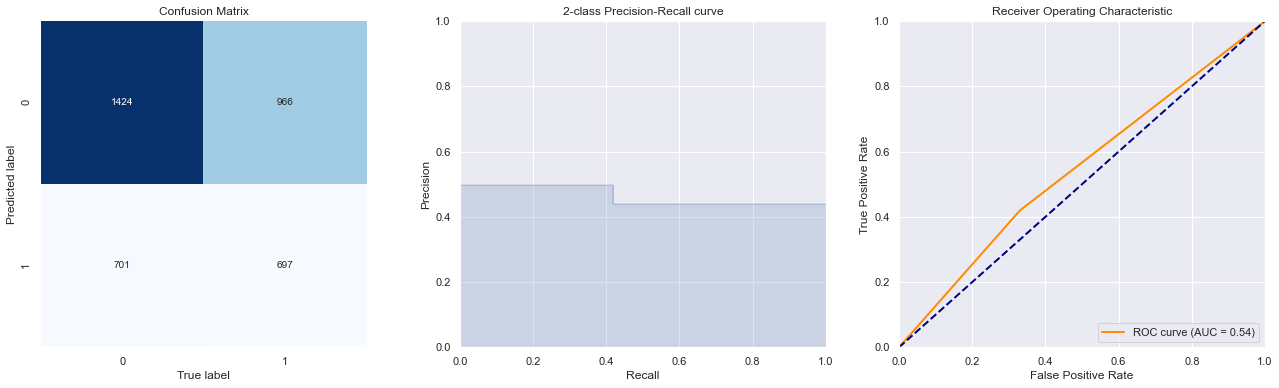

In [230]:
predictions = model_nb.predict(X_test)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)

Accuracy : 0.9113 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8802 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9236 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9126                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


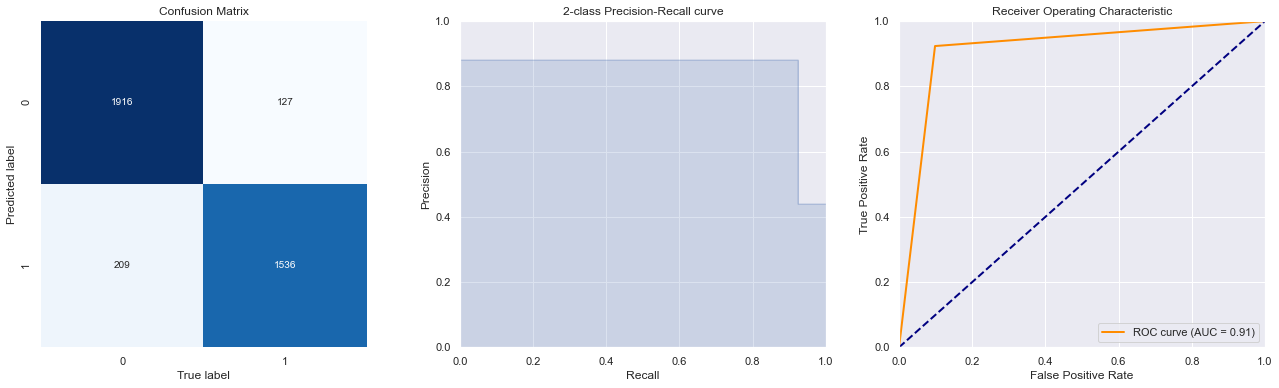

In [231]:
predictions = model_b.predict(X_test)
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)

# Findings and Conclusion

Based on the data collected, we can use Machine Learning model — Gradient Boosting to help with the prediction of fake job listing. It provide the best accuracy at the rate of 91.2%. AUC Score of 0.91 for both test and train test indicates a good classifier and overfitting is unlikely. Recruiters can use the predictive model to prevent such fraudulent job posters, improving the credibility of their recruitment domains.

# Reccommendations

Here are some suggestions for future works.

We can implement deep learning techniques to evaluate performance.To deploy machine learning models to whole data frame. We could evaluate the accuracy, AUC score metrics if all the features were to be used as the predictor columns. To present better models by using Grid Search to use the best estimators.Resampling could have introduced bias. To test out variations of resampling with models.To source for complementary and richer datasets from more recruitment sources to gather insightful data.

# References 

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

https://www.kdnuggets.com/2019/01/solve-90-nlp-problems-step-by-step-guide.html

https://elitedatascience.com/imbalanced-classes

https://www.kaggle.com/arun112/fake-job-posting-prediction